<a href="https://colab.research.google.com/github/julioreis-dev/tutorial_pandas/blob/main/plotgraf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

In [35]:
plt.rcParams['figure.figsize'] = (20,7)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().values.any()

True

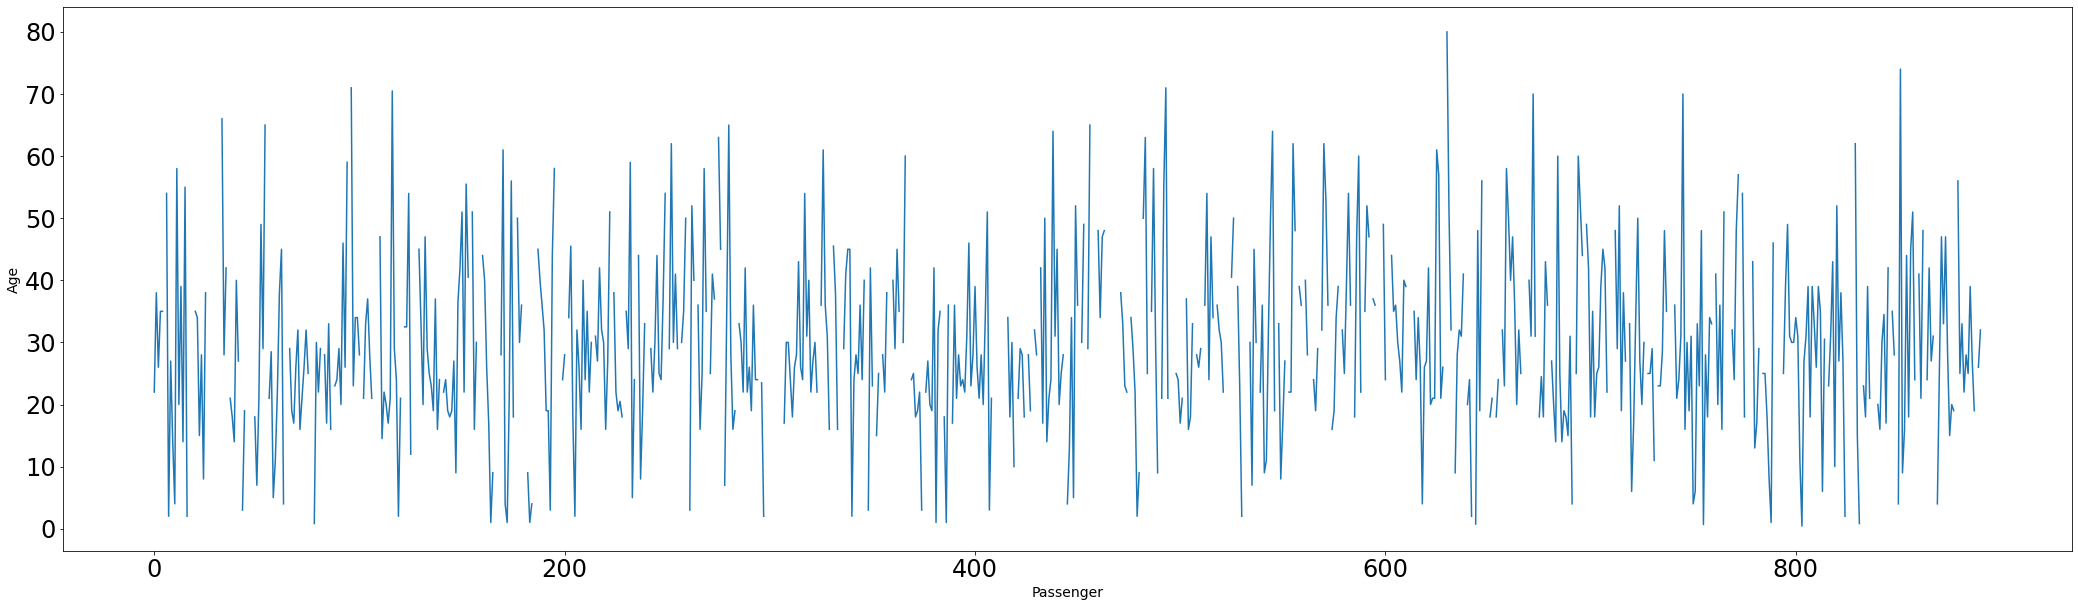

In [30]:
plt.figure(figsize=(36,10))
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('Passenger', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.plot(df.Age)
plt.show()



# **Forma alternativa com o uso do pandas**

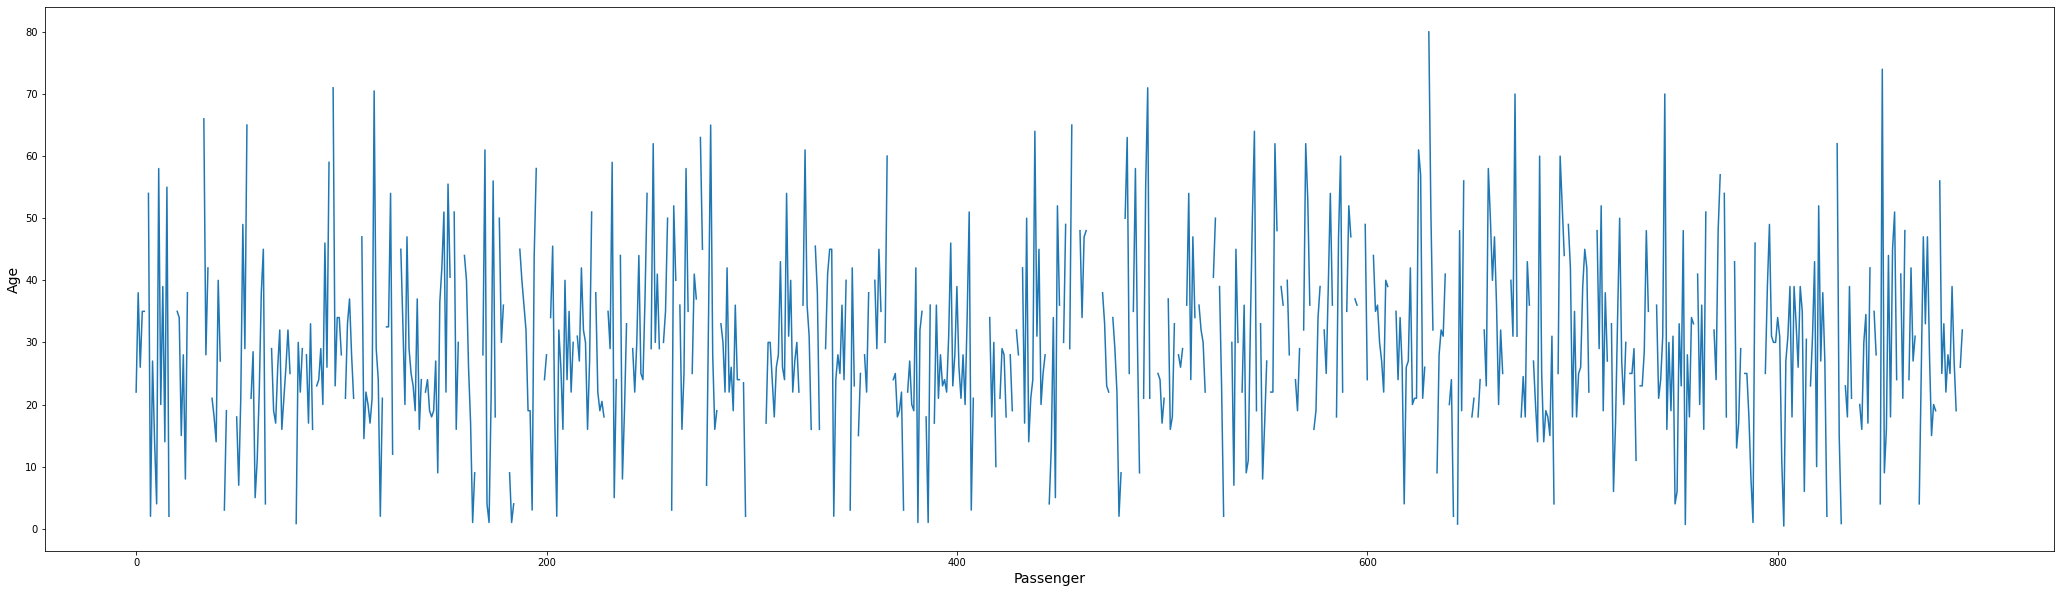

In [29]:
plt.figure(figsize=(36,10))
df.Age.plot()
plt.xlabel('Passenger', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

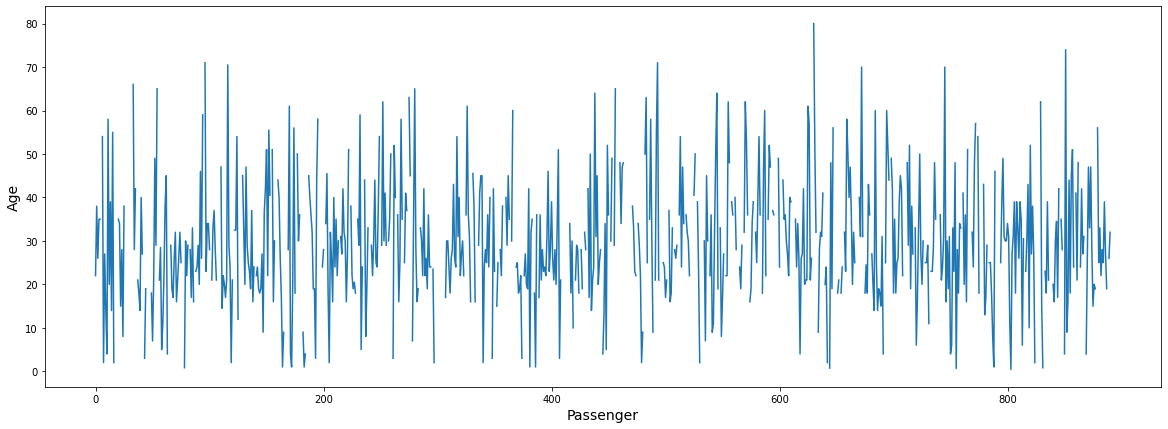

In [37]:
df.Age.plot()
plt.xlabel('Passenger', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

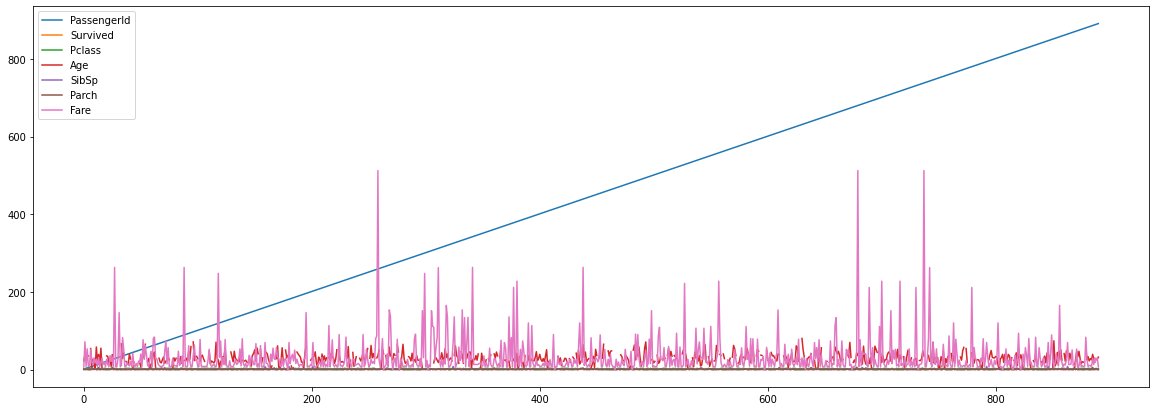

In [36]:
df.plot()
plt.show()

# **Histogramas**

In [38]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

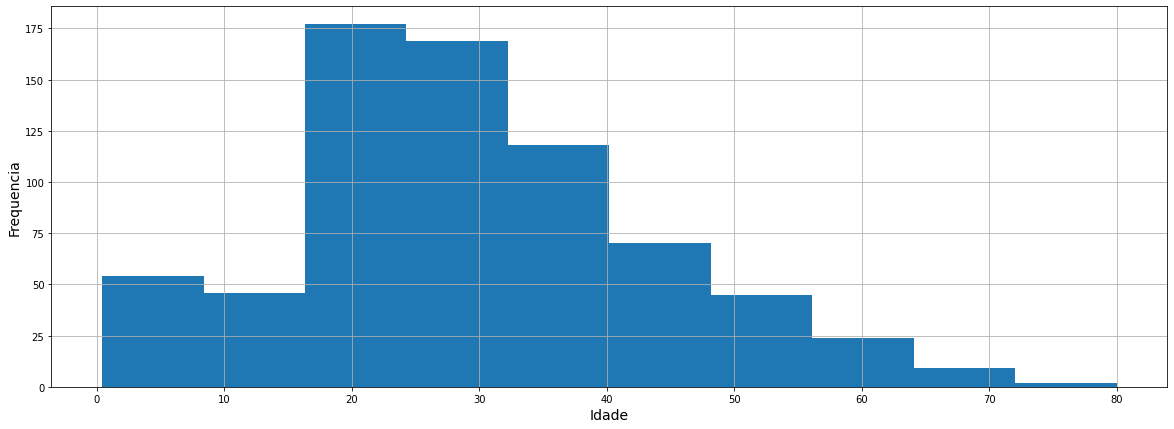

In [42]:
df.Age.hist()
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Frequencia', fontsize=14)
plt.savefig('hist.png')
plt.show()

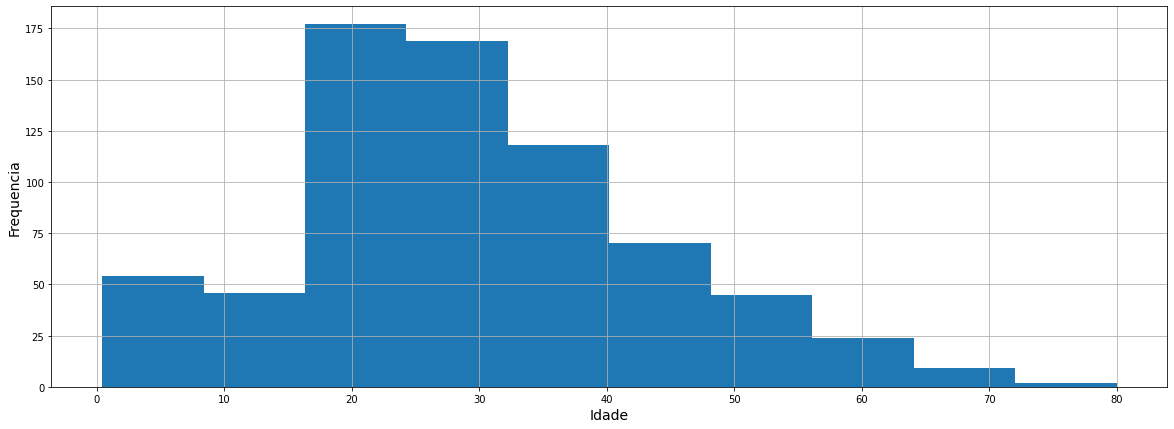

In [44]:
df.Age.hist()
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Frequencia', fontsize=14)
plt.savefig('hist.png', transparent=True)
plt.show()